# Abstract
Unlike the roughly circular orbits of the other seven planets, Mercury's orbit is highly elliptical and its perihelion (point of closest approach to the Sun) precesses or moves foward in angle over time. The accepted value for classical contributions is 531 arcseconds per century, with an additional contribution from relativistic effects. The problem cannot be solved analytically, and thus we used numerical methods to approximate the result. The results of this iteration of code do not sufficiently meet the expected values of perihelion procession. However, the model is sufficiently accurate to demonstrate the perturbation effects of an increase, and a decrease in perihelion angle depending on Mercury's orbit toward or away from its perihelion. The exact evolution of perihelion angle could be met with smaller step size requiring more time. 

# Physical System and Model
The precession of the perihelion of Mercury. Modeled by classical Hamiltonian mechanics and solved by numerical approximation using the Stormer-Verlet "Leap Frog" algorithm. The Model approximates the other 7 planets that perturb mercury's highly elliptical orbit as circular, which then evolve in time according to average distance from the sun over average orbital period. The initial conditions are set based on average velocity/orbit of Mercury, and initial angles of orbit in the 2D plane that give a bounded solution.

# Algorithms
Stormer-Verlet algorithm to solve second order time dependent Hamiltonian for 9 body problem. 
Sympy is also used to symbolically differentiate the hamiltonian and substitute values.

# Code

In [1]:
import proj_4_module as p4
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

%matplotlib inline

In [2]:
G=6.67e-11  #Gravitational constant 
v=47.4e3    #Average orbital velocity of Mercury

radius = np.zeros(8)
radius[0]=57.9e9    #Average distance of Mercury from Sun
radius[1]=108.2e9  #Distance from Sun to Venus
radius[2]=149.6e9  #Distance from Sun to Earth
radius[3]=227.9e9  #Distance from Sun to Mars
radius[4]=778.6e9  #Distance from Sun to Jupiter
radius[5]=1433.5e9 #Distance from Sun to Saturn
radius[6]=2872.5e9 #Distance from Sun to Uranus
radius[7]=4495.1e9 #Distance from Sun to Neptune
radius_sun = 695.508e6

mass = np.zeros(8)
mass_sun=1.989e30  #Mass of Sun  
mass[0]=3.301e23 #Mass of Mercury
mass[1]=4.867e24 #Mass of Venus
mass[2]=5.972e24 #Mass of Earth
mass[3]=6.417e23 #Mass of Mars
mass[4]=1.899e27 #Mass of Jupiter
mass[5]=5.685e26 #Mass of Saturn
mass[6]=8.682e25 #Mass of Uranus
mass[7]=1.024e26 #Mass of Neptune

T = np.zeros(8)
T[1]=224.7*24*3600  #Orbital period of Venus
T[2]=365.2*24*3600  #Orbital period of Earth
T[3]=687.0*24*3600  #Orbital period of Mars
T[4]=4331*24*3600   #Orbital period of Jupiter
T[5]=10747*24*3600  #Orbital period of Saturn
T[6]=30589*24*3600  #Orbital period of Uranus
T[7]=59800*24*3600  #Orbital period of Neptune

angular_velocity = np.zeros(8) #Computing angular velocity for each planet
for i in range(1, 8):
    angular_velocity[i] = (2*np.pi)/T[i]
angular_velocity[1] *= -1
angular_velocity[6] *= -1

initial_angle = np.zeros(8) #Initial angle of each planet
initial_angle[0] = np.radians(48.32)
initial_angle[1] = np.radians(76.6)
initial_angle[2] = np.radians(175.41)
initial_angle[3] = np.radians(49.54)
initial_angle[4] = np.radians(100.51)
initial_angle[5] = np.radians(113.63)
initial_angle[6] = np.radians(73.96)
initial_angle[7] = np.radians(131.78)

x, y, p_x, p_y, t = sp.symbols('x y p_x p_y t')

In [3]:
def position(planet, t):
    x = radius[planet]*sp.cos((angular_velocity[planet]*t) + initial_angle[planet])
    y = radius[planet]*sp.sin((angular_velocity[planet]*t) + initial_angle[planet])
    return x, y

In [4]:
def position_np(planet, t):
    x = radius[planet]*np.cos((angular_velocity[planet]*t) + initial_angle[planet])
    y = radius[planet]*np.sin((angular_velocity[planet]*t) + initial_angle[planet])
    return x, y

In [5]:
def plot_planets(first, last, time=1):
    figure = plt.gca()
    for i in range(first,last+1):
        plot_time = np.arange(0, (T[i]*time)+1, T[i]*time/1000)
        plt.plot(position_np(i,plot_time)[0], position_np(i, plot_time)[1])
    sun = plt.Circle((0,0), radius=radius_sun, color='orange')
    figure.add_patch(sun)
    plt.show()

In [6]:
def distance(planet, t):
    return np.power((position(planet,t)[0]-x)**2 + (position(planet,t)[1]-y)**2, 0.5)

In [7]:
def mod(x, y):
    return np.power(x**2 + y**2, .5)

In [8]:
Hamiltonian = (p_x**2 + p_y**2)/(2*mass[0])-((G*mass_sun*mass[0])/np.power(x**2+y**2,.5)) 
for i in range(1, 8):
    Hamiltonian -= (G*mass[0]*mass[i])/distance(i,t)
print(Hamiltonian)

1.51469251741896e-24*p_x**2 + 1.51469251741896e-24*p_y**2 - 4.379314563e+43*(x**2 + y**2)**(-0.5) - 2.254609408e+39*((-x + 4495100000000.0*cos(1.21608782887007e-9*t + 2.29999488827813))**2 + (-y + 4495100000000.0*sin(1.21608782887007e-9*t + 2.29999488827813))**2)**(-0.5) - 1.9115741094e+39*((-x + 2872500000000.0*cos(2.37739227063423e-9*t - 1.29084551477501))**2 + (-y - 2872500000000.0*sin(2.37739227063423e-9*t - 1.29084551477501))**2)**(-0.5) - 1.2517045395e+40*((-x + 1433500000000.0*cos(6.76673045188707e-9*t + 1.98321762904116))**2 + (-y + 1433500000000.0*sin(6.76673045188707e-9*t + 1.98321762904116))**2)**(-0.5) - 4.181155533e+40*((-x + 778600000000.0*cos(1.67910533748396e-8*t + 1.7542304311795))**2 + (-y + 778600000000.0*sin(1.67910533748396e-8*t + 1.7542304311795))**2)**(-0.5) - 1.4128738839e+37*((-x + 227900000000.0*cos(1.058545155261e-7*t + 0.864636111437991))**2 + (-y + 227900000000.0*sin(1.058545155261e-7*t + 0.864636111437991))**2)**(-0.5) - 1.3148952524e+38*((-x + 14960000000

In [9]:
d_x = sp.diff(Hamiltonian,x)
print(d_x)

4.379314563e+43*x*(x**2 + y**2)**(-1.5) - 2.254609408e+39*(-1.0*x + 4495100000000.0*cos(1.21608782887007e-9*t + 2.29999488827813))*((-x + 4495100000000.0*cos(1.21608782887007e-9*t + 2.29999488827813))**2 + (-y + 4495100000000.0*sin(1.21608782887007e-9*t + 2.29999488827813))**2)**(-1.5) - 1.9115741094e+39*(-1.0*x + 2872500000000.0*cos(2.37739227063423e-9*t - 1.29084551477501))*((-x + 2872500000000.0*cos(2.37739227063423e-9*t - 1.29084551477501))**2 + (-y - 2872500000000.0*sin(2.37739227063423e-9*t - 1.29084551477501))**2)**(-1.5) - 1.2517045395e+40*(-1.0*x + 1433500000000.0*cos(6.76673045188707e-9*t + 1.98321762904116))*((-x + 1433500000000.0*cos(6.76673045188707e-9*t + 1.98321762904116))**2 + (-y + 1433500000000.0*sin(6.76673045188707e-9*t + 1.98321762904116))**2)**(-1.5) - 4.181155533e+40*(-1.0*x + 778600000000.0*cos(1.67910533748396e-8*t + 1.7542304311795))*((-x + 778600000000.0*cos(1.67910533748396e-8*t + 1.7542304311795))**2 + (-y + 778600000000.0*sin(1.67910533748396e-8*t + 1.7542

In [10]:
d_y = sp.diff(Hamiltonian,y)
print(d_y)

4.379314563e+43*y*(x**2 + y**2)**(-1.5) - 2.254609408e+39*(-1.0*y + 4495100000000.0*sin(1.21608782887007e-9*t + 2.29999488827813))*((-x + 4495100000000.0*cos(1.21608782887007e-9*t + 2.29999488827813))**2 + (-y + 4495100000000.0*sin(1.21608782887007e-9*t + 2.29999488827813))**2)**(-1.5) - 1.9115741094e+39*(-1.0*y - 2872500000000.0*sin(2.37739227063423e-9*t - 1.29084551477501))*((-x + 2872500000000.0*cos(2.37739227063423e-9*t - 1.29084551477501))**2 + (-y - 2872500000000.0*sin(2.37739227063423e-9*t - 1.29084551477501))**2)**(-1.5) - 1.2517045395e+40*(-1.0*y + 1433500000000.0*sin(6.76673045188707e-9*t + 1.98321762904116))*((-x + 1433500000000.0*cos(6.76673045188707e-9*t + 1.98321762904116))**2 + (-y + 1433500000000.0*sin(6.76673045188707e-9*t + 1.98321762904116))**2)**(-1.5) - 4.181155533e+40*(-1.0*y + 778600000000.0*sin(1.67910533748396e-8*t + 1.7542304311795))*((-x + 778600000000.0*cos(1.67910533748396e-8*t + 1.7542304311795))**2 + (-y + 778600000000.0*sin(1.67910533748396e-8*t + 1.7542

In [11]:
d_px = sp.diff(Hamiltonian,p_x)
print(d_px)

3.02938503483793e-24*p_x


In [12]:
d_py = sp.diff(Hamiltonian,p_y)
print(d_py)

3.02938503483793e-24*p_y


In [13]:
d_t = sp.diff(Hamiltonian,t)
print(d_t)

-2.254609408e+39*(5466.43639955387*(-x + 4495100000000.0*cos(1.21608782887007e-9*t + 2.29999488827813))*sin(1.21608782887007e-9*t + 2.29999488827813) - 5466.43639955387*(-y + 4495100000000.0*sin(1.21608782887007e-9*t + 2.29999488827813))*cos(1.21608782887007e-9*t + 2.29999488827813))*((-x + 4495100000000.0*cos(1.21608782887007e-9*t + 2.29999488827813))**2 + (-y + 4495100000000.0*sin(1.21608782887007e-9*t + 2.29999488827813))**2)**(-1.5) - 1.9115741094e+39*(6829.05929739682*(-x + 2872500000000.0*cos(2.37739227063423e-9*t - 1.29084551477501))*sin(2.37739227063423e-9*t - 1.29084551477501) + 6829.05929739682*(-y - 2872500000000.0*sin(2.37739227063423e-9*t - 1.29084551477501))*cos(2.37739227063423e-9*t - 1.29084551477501))*((-x + 2872500000000.0*cos(2.37739227063423e-9*t - 1.29084551477501))**2 + (-y - 2872500000000.0*sin(2.37739227063423e-9*t - 1.29084551477501))**2)**(-1.5) - 1.2517045395e+40*(9700.10810278012*(-x + 1433500000000.0*cos(6.76673045188707e-9*t + 1.98321762904116))*sin(6.7667

In [17]:
def d_qH(q,p,time):
    dq = np.zeros(2)
    substitute = [(x,q[0]),(y,q[1]),(p_x,p[0]),(p_y,p[1]),(t,time)]
    dq[0] = d_x.subs(substitute)
    dq[1] = d_y.subs(substitute)
    return dq

In [18]:
def d_pH(q,p,time):
    dp = np.zeros(2)
    substitute = [(x,q[0]),(y,q[1]),(p_x,p[0]),(p_y,p[1]),(t,time)]
    dp[0] = d_px.subs(substitute)
    dp[1] = d_py.subs(substitute)
    return dp

In [19]:
#Perturbed
q_i = np.array([radius[0]*sp.cos(initial_angle[0]), radius[0]*sp.sin(initial_angle[0])])
p_i = np.array([-1*mass[0]*v*sp.cos(initial_angle[0]), mass[0]*v*sp.sin(initial_angle[0])])

orbits = 5
steps_per_orbit = 1500
steps = int(steps_per_orbit*orbits)
step_size = int(10000)

solution = p4.hamiltonian_solve(d_qH,d_pH,d=2,q_0=q_i,p_0=p_i,h=step_size,N=steps,method="SV")

In [20]:
distances = (mod(solution[1][:,0], solution[1][:,1]))
perihelion_index_list = []
perihelion_angle_list = []
perihelion_difference_list = []

for i in range(orbits):
    perihelion_index_list.append(np.argmin(distances[i*steps_per_orbit:(i+1)*steps_per_orbit])+(steps_per_orbit*i))
    perihelion_angle_list.append(np.arctan(solution[1][perihelion_index_list[i],0]/solution[1][perihelion_index_list[i],1]))
    
for i in range(orbits-1):
    perihelion_difference_list.append((perihelion_angle_list[i+1]-perihelion_angle_list[i])*3600) #To arcseconds
    
print("Perihelion Angle as calculated by min distance to center per orbit\n", perihelion_angle_list)
print("Difference in Perihelion Angle between each orbit\n", perihelion_difference_list)
print("Sum of changes in Perihelion Angle\n", np.sum(perihelion_difference_list))
print("Average change in Perihelion angle per orbit\n", np.sum(perihelion_difference_list)/(orbits-1))

Perihelion Angle as calculated by min distance to center per orbit
 [-0.55979528347237606, -0.56205594344294607, -0.56860706557548724, -0.56007664735085916, -0.56236196373862846]
Difference in Perihelion Angle between each orbit
 [-8.1383758940520412, -23.584039677148194, 30.709505608661082, -8.2271389959694741]
Sum of changes in Perihelion Angle
 -9.24004895851
Average change in Perihelion angle per orbit
 -2.31001223963


Maximum forward procession of Lenz Vector Angle at each orbit in arcseconds
 [  1.74087660e+08   9.61194900e+07   1.21696350e+07   7.42554000e+06
   1.54905015e+08]


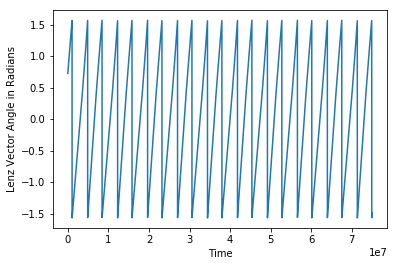

In [21]:
Q = solution[1]
P = solution[2]
Q_3D = np.zeros((steps+1,3))
P_3D = np.zeros((steps+1,3))
for i in range(steps+1):
    Q_3D[i,:] = Q[i][0], Q[i][1], 0
    P_3D[i,:] = P[i][0], P[i][1], 0

L = np.cross(Q_3D, P_3D)
a = np.cross(P_3D, L) - (((mass[0]**2)*G*mass_sun*Q_3D)/(np.linalg.norm(Q_3D)))
#Rescale and go to 2D
A = np.delete(a,2,axis=1)/2e56

#Runge-Lenz Vector angles
A_angles = np.arctan(A[:,1]/A[:,0])
#Plotting Lenz vector angles vs time
plt.xlabel('Time')
plt.ylabel('Lenz Vector Angle in Radians')
plt.plot(solution[0][:],A_angles)

#Initial and Final Lenz Vector Angle
A_max = np.zeros(orbits)
for i in range(orbits):
    A_max[i] = np.argmax(A_angles[i*steps_per_orbit:(i+1)*steps_per_orbit])*206265
print("Maximum forward procession of Lenz Vector Angle at each orbit in arcseconds\n", A_max)
#Seems to be increasing on average. 


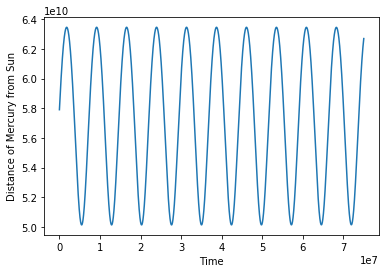

In [22]:
#Mercury Orbit Distance vs. Time
plt.xlabel('Time')
plt.ylabel('Distance of Mercury from Sun')
plt.plot(solution[0], mod(solution[1][:,0],solution[1][:,1]))

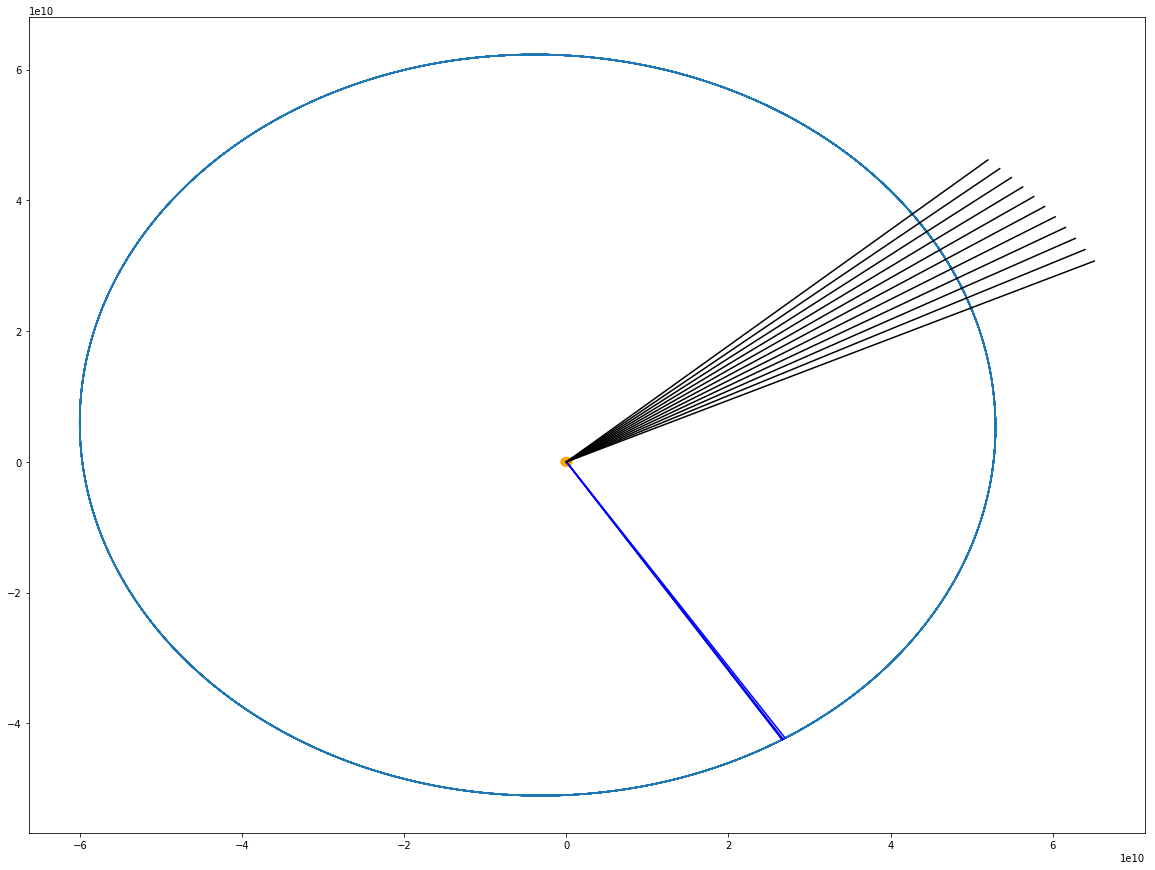

In [30]:
plt.figure(figsize=(20,15))

#Orbital Path of Mercury
plt.plot(solution[1][:,0], solution[1][:,1])

#Plotting Perihelion according to min distance to origin of orbit at each iterative orbit
for i in range(orbits):
    plt.plot([0,solution[1][perihelion_index_list[i],0]], [0,solution[1][perihelion_index_list[i],1]], '-b')
    
#Plotting Direction of Lenz Vector at the end of each orbit
for i in range(0,steps,735):
    plt.plot([0,A[i,0]],[0,A[i,1]], '-k')

#plot planet orbits for some reference scale (first planet, last planet)
plot_planets(1,0)

In [24]:
#Arcseconds per orbit (574 arcseconds/century observed * 88 day orbit)
(574/(365*100))*88

1.383890410958904

# Results
My Results ultimately contain two separate methods for finding the procession of the perihelion of Mercury as shown on the graph above, these results unfortunately contradict one another, and one is only relatively close to the expected value. We expect an average of 1.38 arcsecond change in the relative perihelion angle per orbit. This minute change appears as a single line on the above graph (blue line) with a ~4 arcsecond difference between orbits. The difference can most likely be attributed to several factors including: Not enough accuracy in lower order SV approximation, step size too large (required for my code which was not optimized enough, and did not have sufficient time to run, maybe if I'd ran it over night instead of in about 20 minutes), and finally initial conditions. A major hurdle was finding initial conditions for the time dependent hamiltonian that would result in a bounded solution but still give some realistic orbit with precession. To my knowledge there is no way to analytically find a condition for bounded orbit in a 9 body problem. With these things in mind, I ended up not being able to isolate the change in perihelion due to planetary perturbations from those of jitters in numerical approximation. 

Moving on to the result of the second method, the Runge-Lenz vector which can be seen evolving with the orbit of mercury (black line above) moved significantly throughout the orbit. The first graph above indicates that the lenz vector had forward and backward procession, which is actually realistic for how the lenz vector should develop (backward as mercury moves toward perihelion, forward as it moves away). If I had the time and efficiency of code, I would next run the simulation at a variable step size with larger steps while the orbit is far from the perihelion, and very small accurate steps near the perihelion where mercury is moving much faster, I would run this simulation for long enough to graph the Lenz vector over centuries or orbit and hope to see a fairly linear progression.

Ultimately, the Ring of mass approximation which can be solved analytically resulted in a more accurate prediction, and the precision required to solve this problem was not met by the numerical methods I was able to employ.

# References
https://aapt.scitation.org/doi/10.1119/1.11779

http://www.astronomia.edu.uy/orbe/ExploringTGallardo.pdf

http://www.faculty.umassd.edu/j.wang/vp/CISE-16-01-final.pdf